In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy
import json

### Check for randomization by Glob function in file name query

In [2]:
df = pd.DataFrame(columns=["ReviewId", "Rating" , "LReview", "Review", "MovieID", "Name"])

positive_files = glob.glob("../../../../aclImdb/test/pos/*")
print(len(positive_files))

negative_files = glob.glob("../../../../aclImdb/test/neg/*")
print(len(negative_files))

Mnames = pd.read_json("../../../../aclImdb/TestMovieDetails.json")

movies_neg = []
movies_pos = []

n = 0

try:
    fp = open('../../../../aclImdb/test/urls_pos.txt')
    while(n<200):
        movies_pos.append(fp.readline()[26:35])
        n+=1
finally:
    fp.close()

n = 0

try:
    fp = open('../../../../aclImdb/test/urls_neg.txt')
    while(n<200):
        movies_neg.append(fp.readline()[26:35])
        n+=1
finally:
    fp.close()


12500
12500


In [3]:
positive_files = positive_files[:200]
negative_files = negative_files[:200]
n=0
for i in positive_files:
    part = i[30:]
    rating = part[part.index('_')+1: part.index('.')]
    df.at[(part[:part.index('_')]), "Rating"] = int(rating)
    df.at[(part[:part.index('_')]), "MovieID"] = movies_pos[n]
    df.at[(part[:part.index('_')]), "Name"] = str(Mnames.loc[Mnames['imdbID'] == movies_pos[n]]['Title'])
    with open(i) as f:
        temp = f.read()
        df.at[(part[:part.index('_')]), "Review"] = temp
        df.at[(part[:part.index('_')]), "LReview"] = len(temp)
    n+=1

n=0  

for i in negative_files:
    part = i[30:]
    rating = part[part.index('_')+1: part.index('.')]
    df.at[(part[:part.index('_')]), "Rating"] = int(rating)
    df.at[(part[:part.index('_')]), "MovieID"] = movies_neg[n]
    df.at[(part[:part.index('_')]), "Name"] = str(Mnames.loc[Mnames['imdbID'] == movies_pos[n]]['Title'])
    with open(i) as f:
        temp = f.read()
        df.at[(part[:part.index('_')]), "Review"] = temp
        df.at[(part[:part.index('_')]), "LReview"] = len(temp)
    n+=1
        
df["ReviewId"] = df.index.values

df.sort_values(by=['Rating'], inplace=True)

df["ReviewId"] = pd.to_numeric(df['ReviewId'])

df["LReview"] = pd.to_numeric(df['LReview'])

df["Rating"] = pd.to_numeric(df['Rating'])

df.head()

,ReviewId,Rating,LReview,Review,MovieID,Name
92,92,1,1043,Well........how and where do I start to descri...,tt0291257,"2 Lackawanna Blues\nName: Title, dtype: object"
977,977,1,828,The title leads viewers to believe that this i...,tt0082525,"4 Acrobatty Bunny\nName: Title, dtype: object"
1890,1890,1,844,I was forced to watch this film for my World R...,tt0065611,"0 The Guardian\nName: Title, dtype: object"
0096,96,1,655,Worst movie ever seen. Worst acting too. I can...,tt0065611,"0 The Guardian\nName: Title, dtype: object"
908,908,1,1503,What i hate most in this garbage is the arroga...,tt0018294,"9 Thirst\nName: Title, dtype: object"


In [4]:
df.dtypes

ReviewId     int64
Rating       int64
LReview      int64
Review      object
MovieID     object
Name        object
dtype: object

Text(0, 0.5, 'Count')

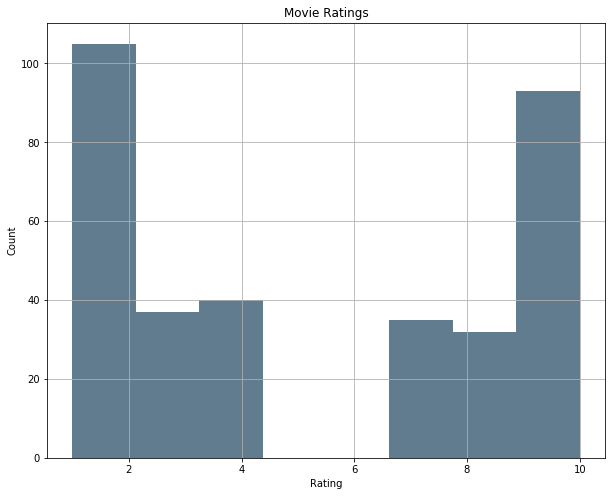

In [5]:
df["Rating"].plot.hist(grid=True, bins=len(df["Rating"].unique()), figsize=(10, 8), color='#607c8e')
plt.title('Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

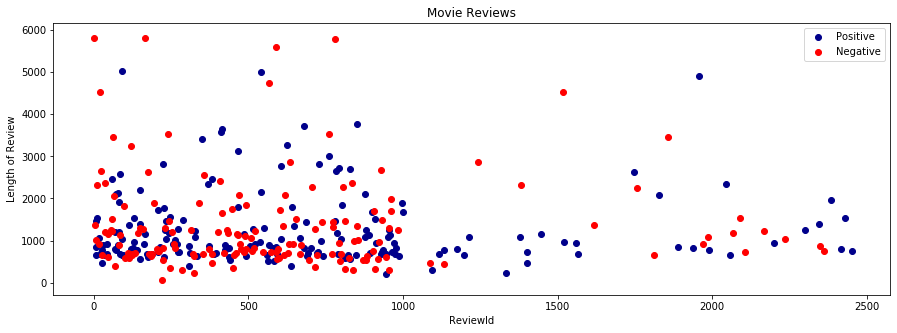

In [6]:
plt.figure(figsize=(15,5))
dfp = df[df["Rating"]<5]
dfn = df[df["Rating"]>5]

plt.title('Movie Reviews')
plt.xlabel('ReviewId')
plt.ylabel('Length of Review')
plt.scatter(x=dfp["ReviewId"], y=dfp["LReview"], c='DarkBlue', label='Positive' )
plt.scatter(x=dfn["ReviewId"], y=dfn["LReview"], c='Red', label='Negative' )
plt.legend(loc="best")
plt.show()


In [28]:
a = 'tt0065611'
tdf = df[df["MovieID"] == a]
tdf

,ReviewId,Rating,LReview,Review,MovieID,Name
1890,1890,1,844,I was forced to watch this film for my World R...,tt0065611,"0 The Guardian\nName: Title, dtype: object"
0096,96,1,655,Worst movie ever seen. Worst acting too. I can...,tt0065611,"0 The Guardian\nName: Title, dtype: object"
008,8,1,850,"Well it is about 1,000 years in the future and...",tt0065611,"0 The Guardian\nName: Title, dtype: object"
248,248,3,1553,"When Hollywood is trying to grasp what an ""int...",tt0065611,"0 The Guardian\nName: Title, dtype: object"
027,27,4,467,"Technically abominable (with audible ""pops"" be...",tt0065611,"0 The Guardian\nName: Title, dtype: object"
290,290,4,1490,Respected western auteur Budd Boetticher is wo...,tt0065611,"0 The Guardian\nName: Title, dtype: object"
72,72,4,2109,Man with the Screaming Brain is a story of gre...,tt0065611,"0 The Guardian\nName: Title, dtype: object"
468,468,7,1132,This British documentary was recently shown on...,tt0065611,"3 Darling Lili\nName: Title, dtype: object"
655,655,7,1521,I went into this film thinking I wasn't going ...,tt0065611,"3 Darling Lili\nName: Title, dtype: object"
0780,780,7,5796,Talk Radio sees a man somewhat accidentally st...,tt0065611,"3 Darling Lili\nName: Title, dtype: object"


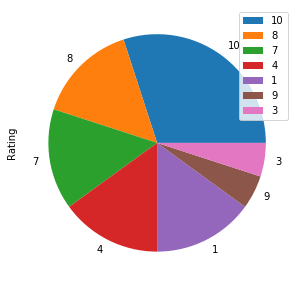

In [29]:
counts = pd.DataFrame(tdf['Rating'].value_counts())
counts.plot.pie(y='Rating', figsize=(5, 5))

In [30]:
bar = pd.DataFrame({"Positive":[0],
                    "Negative":[0]})
bar

,Positive,Negative
0,0,0


In [31]:
for i in counts.index.values:
    if i < 5:
        bar["Negative"] += counts.loc[i ,'Rating']
    else:
        bar["Positive"] += counts.loc[i, 'Rating']
        
bar

,Positive,Negative
0,13,7


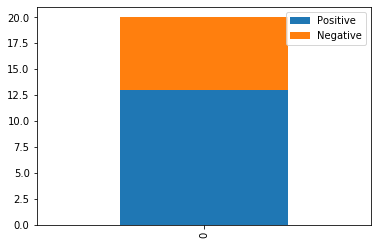

In [32]:
bar.plot(kind='bar', stacked=True)

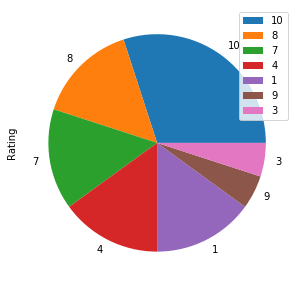

In [26]:
counts.plot.pie(y='Rating', figsize=(5, 5))

In [9]:
df["Rating"] = pd.to_numeric(df['Rating'])
df.groupby(["MovieID"]).mean()['Rating']


MovieID
tt0018294    1.000000
tt0025227    4.000000
tt0029836    2.500000
tt0036723    2.333333
tt0037595    1.000000
tt0037620    1.000000
tt0038286    8.500000
tt0044417    2.166667
tt0044778    4.000000
tt0050634    8.833333
tt0064990    4.000000
tt0065611    6.600000
tt0069994    1.666667
tt0072930    1.000000
tt0073271    1.000000
tt0073906    1.666667
tt0076478    2.000000
tt0077245    1.500000
tt0079261    2.800000
tt0082084    5.764706
tt0082525    1.000000
tt0083973    2.142857
tt0085461    8.333333
tt0086071    4.000000
tt0086544    2.000000
tt0095357    3.000000
tt0103886    7.428571
tt0109576    3.500000
tt0110604    3.000000
tt0113638    4.000000
               ...   
tt0157784    1.000000
tt0178928    1.800000
tt0184474    8.307692
tt0194773    2.750000
tt0220173    2.384615
tt0251094    2.000000
tt0253016    4.000000
tt0265298    1.000000
tt0291257    1.000000
tt0312859    1.000000
tt0319477    3.000000
tt0323571    1.571429
tt0325129    8.250000
tt0366518    2.200000
tt